# User's Guide, Chapter 19: Advanced Durations (Complex and Tuplets)

When last we encountered the :class:`~music21.duration.Duration` object, it was Chapter 3, and we didn't know about Streams or any of a thousand other cool things that are now under our belts, so it seems a good idea to get back to Duration objects and look in a bit more depth at how they work.

We'll recall that one thing that all `Music21Objects` have a `Duration` object stored on their `.duration` attributes:

In [1]:
n = note.Note('C#4')
n.duration

<music21.duration.Duration 1.0>

...and that durations can be created directly:

In [2]:
d = duration.Duration(4.0)
d

<music21.duration.Duration 4.0>

...and that all durations have `.type`, `.dots`, and `.quarterLength`.

In [3]:
d = duration.Duration(1.5)
(d.type, d.dots, d.quarterLength)

('quarter', 1, 1.5)

The standard `type` values range from tiny 2048th notes up through the immense duplex-maxima:

In [4]:
startType = '2048th'
try:
    while True:
        print(startType, end=", ")
        startType = duration.nextLargerType(startType)
except duration.DurationException:
    pass

2048th, 1024th, 512th, 256th, 128th, 64th, 32nd, 16th, eighth, quarter, half, whole, breve, longa, maxima, duplex-maxima, 

The number of dots is limited only by your own imagination (or the limit of expressibility of your computer):

In [5]:
for dots in range(12):
    print(dots, duration.Duration(type='quarter', dots=dots))

0 <music21.duration.Duration 1.0>
1 <music21.duration.Duration 1.5>
2 <music21.duration.Duration 1.75>
3 <music21.duration.Duration 1.875>
4 <music21.duration.Duration 1.9375>
5 <music21.duration.Duration 1.96875>
6 <music21.duration.Duration 1.984375>
7 <music21.duration.Duration 1.9921875>
8 <music21.duration.Duration 1.99609375>
9 <music21.duration.Duration 1.998046875>
10 <music21.duration.Duration 1.9990234375>
11 <music21.duration.Duration 1.99951171875>


For the very curious, try setting the number of dots to `float('inf')` and seeing what happens to `type`, `dots`, and `quarterLength`. (A little Easter egg...)

A lot of Duration values can be expressed with all these types and dots, but not all of them.  We can get some more by moving on to Tuplets.

## Tuplets

Tuplets, such as triplets, can be set by giving a fraction or close approximation to a fraction as a quarter length:

In [6]:
d = duration.Duration(0.3333333333333)
d

<music21.duration.Duration 1/3>

The quarterLength of a duration such as this will be expresssed as a `fractions.Fraction` class:

In [7]:
d.quarterLength

Fraction(1, 3)

This can be converted to a floating point approximate representation by wrapping it in the `float()` function:

In [8]:
float(d.quarterLength)

0.3333333333333333

We can check that this duration represents a triplet by looking at the `.fullName` property of the duration:

In [9]:
d.fullName

'Eighth Triplet (1/3 QL)'

But where is the information about the triplet stored?  It's not in the type or dots:

In [10]:
(d.type, d.dots)

('eighth', 0)

Instead it's to be found in the `.tuplets` property:

In [11]:
d.tuplets

(<music21.duration.Tuplet 3/2/eighth>,)

One thing that we learn from the property is that there's a separate class that defines tuplets, the `duration.Tuplet` class.  Let's look at what it can do.  We can create a simple Tuplet by passing in the number of notes to be played in the place of another note.  For instance, a 5-in-the-place-of-4 Tuplet is created like this:

In [12]:
fiveInFour = duration.Tuplet(5, 4)
fiveInFour

<music21.duration.Tuplet 5/4>

Each Duration that has a 5:4 tuplet applied to it will be 4/5ths as long as it would be without it.  I know this by querying the `.tupletMultiplier()` method

In [13]:
fiveInFour.tupletMultiplier()

Fraction(4, 5)

At this point, the tuplet represents any 5:4 tuplet -- whether 5 quarters in the place of 4 quarters, or 5 16ths in the place of 4 16ths.  If it's important to know that this represents 5 eighths in the place of 4 eighths, we can call `setDurationType()`:

In [14]:
fiveInFour.setDurationType('eighth')

Now we can ask how many quarter notes (i.e., what quarterLength) will be necessary to fulfill the promise of the tuplet:

In [15]:
fiveInFour.totalTupletLength()

2.0

This changes if we change the durationType.  Let's say that it's five dotted quarters in the place of four dotted quarters:

In [16]:
fiveInFour.setDurationType('quarter', dots=1)
fiveInFour.totalTupletLength()

6.0

We can also create tuplets that represent unusual cases, such as 11 sixteenth-notes in the place of one doubly-dotted quarter note:

In [17]:
oddTuplet = duration.Tuplet(11, 1)
oddTuplet.durationActual = '16th'
oddTuplet.durationNormal = duration.Duration('quarter', dots=2)
oddTuplet.totalTupletLength()

1.75

In [18]:
oddTuplet.tupletMultiplier()

Fraction(7, 11)

Okay, let's get back to simpler tuplets.  Like our 3:2 triplet.

Tuplets have a `.type` which is usually None:

In [19]:
trip = duration.Tuplet(3, 2)
trip.type is None

True

the `.type` will be "start" if `music21` or a user of it has determined that this tuplet begins a tuplet bracket or grouping.  It will be "stop" if it ends a grouping, and it'll be startStop if it's an isolated tuplet that both begins and ends a grouping.  None means that no determination has been made about whether this is the beginning, middle, or end of a bracket.  (Eventually we will support `False` to mean do not end a bracket here in any case).

Of course a bracket will only be drawn if you want one, which means that `.bracket` needs to be True.

In [20]:
trip.bracket

True

And we'll need to know what should go in the bracket.  Usually, we just want the number "3" to go in the bracket:

In [21]:
(trip.tupletActualShow, trip.tupletNormalShow)

('number', None)

If we wanted "3:2" then we'd set "trip.tupletNormalShow" to "number".

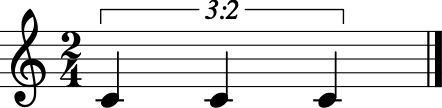

In [22]:
n = note.Note()
n.duration = duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, meter.TimeSignature('2/4'))
s.show()

We can also set it to "type" or "both" to add the note shape to the bracket, but unfortunately, no MusicXML client yet supports this display on input or output.

Now we're ready to return to the `Duration` class.  Since the `.tuplets` property returns a tuple (appropriately enough), it's not something that can be manipulated directly.  To add a tuplet to an existing duration, use the `.appendTuplet(t)` method:

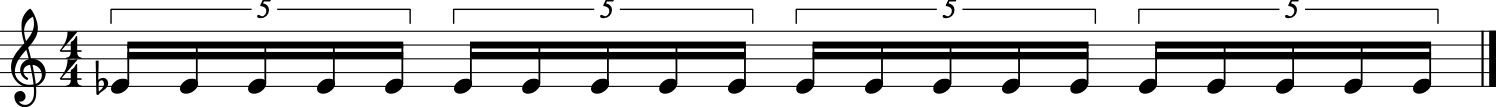

In [23]:
t = duration.Tuplet(5, 4)
t.setDurationType('16th')
d = duration.Duration('16th')
d.appendTuplet(t)
n = note.Note('E-4')
n.duration = d
s = stream.Stream()
s.repeatAppend(n, 20)
s.show()

Once a `Tuplet` is appended to a `Duration`, it becomes "frozen" and no further changes to its duration can be set (though its `.type` and display styles can still be changed).  This is to prevent changes to the duration that won't be reflected in the `Duration` object:

In [24]:
t.frozen

True

Nested tuplets can be created by adding more than one tuplet to the duration:

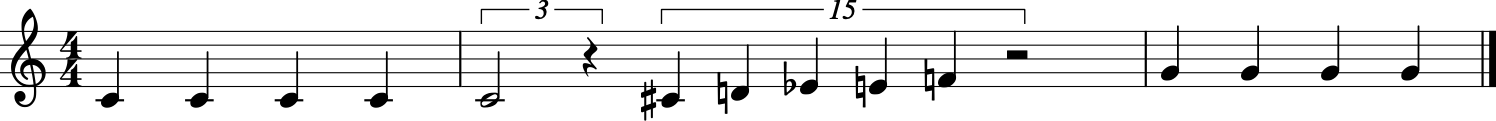

In [25]:
import copy
s = stream.Stream()
s.repeatAppend(note.Note(), 4)

t32h = duration.Tuplet(3, 2, 'half')
t54q = duration.Tuplet(5, 4, 'quarter')
n1 = note.Note()
n1.duration.type = 'half'
n1.duration.appendTuplet(copy.deepcopy(t32h))
s.append(n1)
for i in range(5):
    n = note.Note(61 + i)
    n.duration.type = 'quarter'
    n.duration.appendTuplet(copy.deepcopy(t32h))
    n.duration.appendTuplet(copy.deepcopy(t54q))
    s.append(n)
s.notes[4].duration.tuplets[0].type = 'start'
s.notes[5].duration.tuplets[1].type = 'start'
s.notes[-1].duration.tuplets[0].type = 'stop'
s.notes[-1].duration.tuplets[1].type = 'stop'
s.repeatAppend(note.Note('G4'), 4)
s.show()

For nested tuplets, it's important to explicitly state where tuplet brackets start and stop. As you can see from the output, MusicXML rendering of Nested tuplets is still hard for our partners at MuseScore which generated the image above (Finale renders a --5-- bracket around the five quarter notes.  However, MIDI rendering is correct:

In [30]:
s.show('midi')

The effect of any set of tuplets on the overall duration of a note can be found through the `.aggregateTupletMultiplier()` method:

In [31]:
d = duration.Duration('half')
d.appendTuplet(duration.Tuplet(3, 2))
d.appendTuplet(duration.Tuplet(7, 5))
d.aggregateTupletMultiplier()

Fraction(10, 21)

## Unlinking Durations

Each `Duration` object has four essential pieces of information, the `type` (whole, 16th, breve, etc.), the number of dots (or `dotGroups`, discussed below), a list of zero or more tuplets, and the overall length of the duration (`.quarterLength`).  Generally speaking, changing one of these pieces of information changes the one or more of the others:

In [32]:
d = duration.Duration(3.0)
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (), 3.0)

In [33]:
d.quarterLength *= 4/5
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (<music21.duration.Tuplet 5/4/half>,), Fraction(12, 5))

In [34]:
d.type = '16th'
d.dots = 2
(d.type, d.dots, d.tuplets, d.quarterLength)

('16th', 2, (<music21.duration.Tuplet 5/4/half>,), Fraction(7, 20))

However, there are times when we might want to separate one piece of information separate from another.
For instance,
[in some pieces](https://homes.luddy.indiana.edu/donbyrd/InterestingMusicNotation.html),
Brahms uses a dotted half note to mean a note that is eleven sixteenth-notes long, rather than twelve.  We can represent this in `music21` by setting up the type and dots and then setting `Duration.linked` to False.

In [35]:
d = duration.Duration()
d.type = 'half'
d.dots = 1
(d.type, d.dots, d.quarterLength)

('half', 1, 3.0)

In [36]:
d.linked

True

In [37]:
d.linked = False
d.quarterLength = 11/4
(d.type, d.dots, d.quarterLength)

('half', 1, 2.75)

In theory, the musicXML spec allows us to preserve such note lengths in notation, but in practice no notation software will support this, correcting the error in the difference between .quarterLength (in MusicXML divisions) and type:

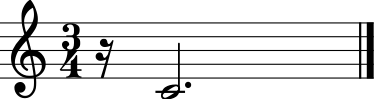

In [38]:
r = note.Rest(type='16th')
n = note.Note()
n.duration = d
s = stream.Stream([meter.TimeSignature('3/4'), r, n])
s.show()

(but the output looks good for a single note.)

Unlinked durations come in handy if, for instance, we're parsing in notes from MIDI or an audio file and we want to retain the exact quarterLength duration (or set qtr=60 and just store the number of seconds) but have type that represents the closest notateable type.

## DotGroups -- a small digression from the Middle Ages...

There's actually one more thing that durations store, and it's a little bit silly for most uses, but reflects `music21`'s commitment to being able to represent all the music that's been notated over time.  In the Middle Ages, it was common to have notes that were worth 9 or 27 times smaller note values.  In modern transcriptions, a note worth 9 eighth notes is often notated as a dotted-dotted half note, that is to say, a dotted half note which is itself dotted (or 1.5x the length of a dotted half note).  See the [second example from my blog post about dots](http://prolatio.blogspot.com/2013/10/advanced-dotting.html). These dotted-dotted notes are represented by "dotGroups" in music21, which is a list of the number of dots at each level of dotting.  For instance:

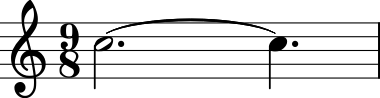

In [39]:
n = note.Note('C5', type='half')
n.duration.dotGroups = (1, 1)
n.show()

Since no current MusicXML readers support dot groups, they are represented by the closest acceptable notation unit, respecting the fact that they are essentially dotted-dotted notes.

## Durations that take no time at all.

Among the duration types, such as 'half', 'whole', etc. there's one strange `type` called "zero".
Durations with type "zero" measure objects that don't have any length at all.  It's
used for measuring the conceptual length of grace notes,
spaceless objects like `Clefs`, Liz Taylor's marriages,
etc.:

In [40]:
k = key.KeySignature(3)
k.duration

<music21.duration.Duration 0.0>

In [41]:
k.duration.type

'zero'

We will talk more about zero-duration objects when we get to Grace Notes in :ref:`Chapter 27<usersGuide_27_graceNotes>`.

## Complex Durations

Counting notes isn't as easy as we might think. For instance, listen to this little "piece":

In [43]:
s = stream.Stream()
s.append(meter.TimeSignature('5/4'))
s.append(note.Note('C4', quarterLength=2.25))
s.append(note.Note('C#4', quarterLength=2.75))
s.show('midi')

That sounds like it has two notes in it to me! But look at the best representation of it on a page:

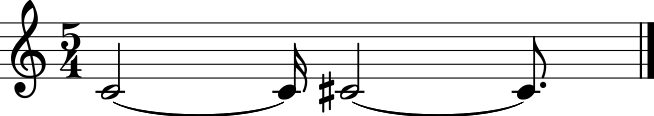

In [44]:
s.show()

Now it looks like it has four notes in it!  Which number is right?  It depends on what is most important to you.  Sometimes you will want to work with the specific graphical symbols on the page.  Sometimes you only care about the number of distinct sounds.  And quite often you'll want to change from one representation to another within the same analysis task.  `Music21` makes moving between these two representations possible and after a while quite simple using the concepts of ties and complex durations.

Complex `Durations` are those that can't be expressed easily
as a single written `Note` on a page.  For instance, a `Note`
lasting a half-note plus a sixteenth-note can't be written as
a single `Note` graphic, but it's perfectly fine to use as a
quarterLength.

In [45]:
oddDuration = duration.Duration()
oddDuration.quarterLength = 2.25

The `type` for these odd values is called "complex":

In [46]:
oddDuration.type

'complex'

Complex types have multiple "DurationTuple" objects in `.components` that represent the smaller, simple durations that make up the entire Duration:

In [47]:
oddDuration.components

(DurationTuple(type='half', dots=0, quarterLength=2.0),
 DurationTuple(type='16th', dots=0, quarterLength=0.25))

Some durations have multiple components even though they might not need them:

In [48]:
d = duration.Duration(1.0)
d.addDurationTuple(duration.DurationTuple('eighth', 0, 0.5))
d.components

(DurationTuple(type='quarter', dots=0, quarterLength=1.0),
 DurationTuple(type='eighth', dots=0, quarterLength=0.5))

In [49]:
d.type

'complex'

For these durations, there's a method called `.consolidate()` that will put both of these components together into one component.  In this case, it's a nice dotted quarter note:

In [50]:
d.consolidate()
(d.type, d.dots, d.quarterLength)

('quarter', 1, 1.5)

In [51]:
d.components

(DurationTuple(type='quarter', dots=1, quarterLength=1.5),)

However, forcing something that really should have multiple components into one creates an "inexpressible" type that can't be outputted to most formats:

In [52]:
d = duration.Duration(5.0)
d.consolidate()
d.type

'inexpressible'

In [53]:
d.components

(DurationTuple(type='inexpressible', dots=0, quarterLength=5.0),)

To fix this situation, the easiest thing to do is just to assign the duration its own quarterLength.

In [54]:
d.quarterLength = d.quarterLength
d.components

(DurationTuple(type='whole', dots=0, quarterLength=4.0),
 DurationTuple(type='quarter', dots=0, quarterLength=1.0))

## Splitting and Tied objects:

In the last section we ended up with a Duration object with two components, a whole-note's duration and a quarter-note's duration.  We can conceive of either one note having this duration, or two notes with this duration that are tied together.  Let's look at how to move from one view to another, first by attaching the duration to a note.

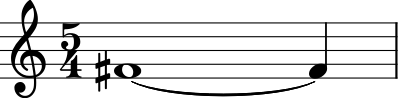

In [55]:
n = note.Note('F#4')
n.duration = d
n.show()

Now let's split this Note according to its component durations using the :meth:`~music21.base.Music21Object.splitAtDurations` method found on every `Music21Object`.

In [56]:
split = n.splitAtDurations()
split

(<music21.note.Note F#>, <music21.note.Note F#>)

In [57]:
[subNote.quarterLength for subNote in split]

[4.0, 1.0]

So now instead of one note with the duration of 5.0 quarter notes, we have two notes, one which is a whole note and the other which is a quarter note.  If we put both of them into a stream, we can see how they look:

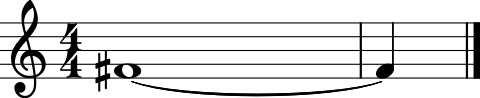

In [58]:
s = stream.Stream()
s.append(split)
s.show()

Notice the one subtle difference between the two representations.  In the second case, since there were two notes (and not explicit time signatures), the Stream was allowed to split the notes into two measures in order to use the more common time signature of 4/4.

But how does the Stream know that the two notes should have a tie connecting them?  The answer is that `splitAtDurations` sets the `.tie` attribute on each of the notes:

In [59]:
split[0].tie

<music21.tie.Tie start>

In [60]:
split[1].tie

<music21.tie.Tie stop>

We will learn more about Ties in :ref:`Chapter 31, Clefs, Ties, and Beams <usersGuide_31_clefs>`.

When splitting an object such as a :class:`~music21.note.Rest` that doesn't use ties, music21 is smart enough not to add ties:

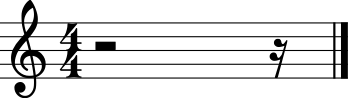

In [61]:
r = note.Rest(quarterLength=2.25)
s = stream.Stream()
s.append(r.splitAtDurations())
s.show()

## Conclusion

In this chapter we learned many of the advanced features of durations, such as how they can be composed of multiple components called `DurationTuples`, how triplets and other tuplets work, how durations can be linked or unlinked, and how splitting a Note or other object works.

It's been a while since we've put all our knowledge to work, so in :ref:`Chapter 20, Examples 2 <usersGuide_20_examples2>` we'll consolidate our knowledge in the service of analysis.